In [1]:
import numpy as np
import pandas as pd

import matplotlib as mp
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

# Step 1. Data Preprocessing

## Load the dataset

In [2]:
# Load the dataset
boston = load_boston()

# Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Put the data into Pandas dataframe
features = pd.DataFrame(boston.data, columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
features["AGE"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [5]:
target = pd.DataFrame(boston.target, columns=["target"])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
# max(dataframe_object[column_name])
max(target["target"])

50.0

In [7]:
min(target["target"])

5.0

In [8]:
# Concatenate features and target into a single Dataframe
df = pd.concat([features,target], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
# Use round(decimals = 2) to set the precision to 2 decimal places
df.describe().round(decimals = 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


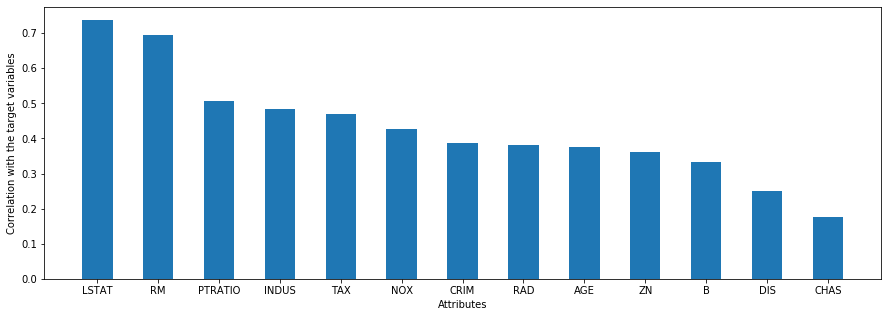

In [10]:
# Calculate correlation between every column on the data
corr = df.corr("pearson")

# Take absolute values of correlation
corrs = [abs(corr[attr]["target"]) for attr in list(features)]

# Make a list of pairs [(corr, feature)]
l = list(zip(corrs, list(features)))

# Sort the list of pairs in reverse/descending order,                       
# With the correlation value as the key for sorting
l.sort(key = lambda x:x[0], reverse = True)

# Unzip pairs to two lists
# Zip(*l) - Takes a list that look like [[a, b, c],[d, e, f],[g, h, i]]
# and returns [[a, d, g],[b, e, h],[c, f, i]]
corrs, labels = list(zip((*l)))

# Plot correlation with respect to the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width=0.5)
plt.xlabel("Attributes")
plt.ylabel("Correlation with the target variables")
plt.xticks(index, labels)
plt.show()


# We observe from the bar graph generated above, that LSTAT and RM have the two highest correlation value

## Normalize the data

Normalize the data with MinMaxScaler

In [11]:
X = df["LSTAT"].values 
y= df["target"].values

In [12]:
# Before normalization
print(y[:5])

[24.  21.6 34.7 33.4 36.2]


In [13]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1, 1))
X = X[:, -1]
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.reshape(-1, 1))
y = y[:, -1]

In [14]:
# After normalisation
print(y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

In [16]:
def error(m, x,c, t):
    N = x.size
    e = sum(((m*x + c)-t)**2)
    return e*1/(2*N)

In [17]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2*((m*x + c)-t)*x)*learning_rate
    grad_c = sum(2*((m*x + c)-t))*learning_rate
    m = m - grad_m
    c = c - grad_c
    return m, c

In [18]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print("Error less than the threshold. Stopping Gradient Descent.")
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values

In [19]:
init_m = 0.09
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, X_train, y_train, learning_rate, iterations, error_threshold)
c

0.6280025961950132

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

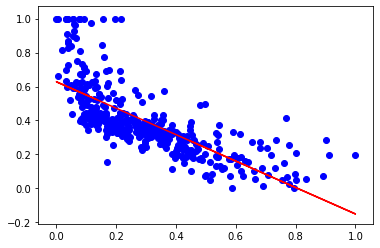

In [21]:
plt.scatter(X_train, y_train, color="b")
plt.plot(X_train, (m*X_train + c), color="r")

Text(0.5, 0, 'Iterations')

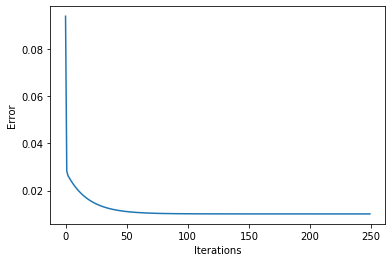

In [22]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel("Error")
plt.xlabel("Iterations")

In [23]:
y_preds = m*X_test + c
y_preds

array([ 0.31729933,  0.45858665,  0.21745343,  0.33941574, -0.12889375,
        0.28315848,  0.53309531,  0.48091778,  0.5887084 , -0.0737101 ,
        0.43153163,  0.36239103,  0.26877208,  0.16506117,  0.59515007,
        0.03107442,  0.41499801,  0.49229806,  0.37656271,  0.37849521,
        0.29690071,  0.45665415,  0.32288211,  0.35079602,  0.15046005,
        0.55370866,  0.52085614,  0.31708461,  0.35337269,  0.5723895 ,
        0.32094961,  0.29561237,  0.2382815 ,  0.29346515,  0.56723617,
        0.46567249,  0.37870993,  0.59386174,  0.37892465,  0.32674712,
        0.15432506,  0.14638033,  0.50346362,  0.54726699,  0.46846388,
        0.08926418,  0.52300336,  0.41821884,  0.34242185,  0.38772827,
        0.44806525,  0.34091879,  0.46030443,  0.36131742,  0.58849368,
        0.35509047,  0.42294274,  0.35186963,  0.51634697,  0.50196057,
        0.45600998,  0.55327921,  0.26233041,  0.50754335,  0.29410932,
        0.07015389,  0.16398756,  0.57582506,  0.3140785 ,  0.37

In [24]:
mean_squared_error(y_test, y_preds)

0.014483373189934527

In [25]:
# Displaying the dataframe of test and predicted values
p = pd.DataFrame(list(zip(y_test, y_preds)), columns=["target", "predicted"])
p.head(10)

,target,predicted
0,0.320000,0.317299
1,0.420000,0.458587
2,0.144444,0.217453
3,0.148889,0.339416
4,0.044444,-0.128894
5,0.220000,0.283158
6,0.400000,0.533095
7,0.420000,0.480918
8,0.717778,0.588708
9,0.208889,-0.073710


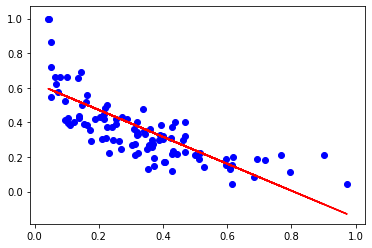

In [26]:
plt.scatter(X_test, y_test, color="b")
plt.plot(X_test, y_preds, color="r")